# Laboratorio 12: Regresión logística
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez

**Número del grupo**

Grupo 2

# Contexto

Uno de lo cánceres más comunes entre la población femenina es el cáncer de seno. Éste ocurre cuando las células normales mutan y se transforman en células cancerígenas. Esta transformación puede ser evaluada a través de procedimientos en los que se extraen muestras que se observan bajo el microscopio. Se ha mostrado que en etapas tempranas el núcleo de las células provenientes de los tumores cambia su morfología, permitiendo predecir el desarrollo del cáncer (Narasimha et al., 2013).

En el presente laboratorio entrenaremos un modelo de regresión logística para predecir si las células provenientes de un tumor están en proceso de mutación carcinogénica. Es decir, diseñaremos un modelo para clasificación, la cual es una tarea que hace parte del paradigma de aprendizaje supervisado en machine learning. 

Para entrenar el modelo usaremos una base de datos que consta de 469 muestras obtenidas de dos tipos de pacientes: aquellas que desarrollaron cáncer de seno y las que no. Clasificaremos dicha aparición a partir de dos características: el **radio promedio** y **índice de suavidad** (_smoothness index_) de los núcleos de las células. Esta última medida hace referencia a un índice de variación local del radio en un mismo núcleo, por lo que ante menor índice de suavidad, más redondo será el núcleo. Estas medidas se toman a partir de una imagen del tejido, como se muestra en la Figura 1.

</div>
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1T7k9PfuMT7DCvvXzcdO523VZ1ID0MAhW" width="500">
</div>
<center> Figura 1. Muestras de núcleos celulares de biopsias de tumores de seno, los núcleos pequeños y redondos proceden de muestras no-cancerígenas (Narasimha et al., 2013). </center>



> Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. _International Journal of Applied and Basic Medical Research_, 3(1), 22.


1. Importe los datos del archivo *Breast_Cancer_Train.csv*. Este archivo corresponde a un dataframe con encabezados. El encabezado _"Pronostic"_ corresponde al pronóstico de las muestras: 
1 = la muestra proviene de un tumor maligno;
0 = la muestra proviene de un tumor benigno.\
\
Realice un **scatter plot** de dos dimensiones donde cada muestra es un punto y el color está asociado al diagnóstico. Elija colores distintos para cada diagnóstico, y analice la gráfica resultante.


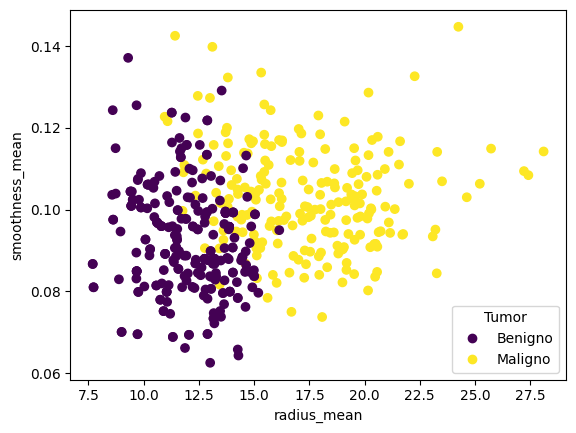

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

data_df = pd.read_csv('Breast_Cancer_Train.csv')
# print(data_df.to_string())

legend_names = ["Benigno", "Maligno"] 

plt.figure()
scatter = plt.scatter(data_df['radius_mean'], data_df['smoothness_mean'], c=data_df['pronostic'])
plt.xlabel('radius_mean')
plt.ylabel('smoothness_mean')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_names, title="Tumor")
plt.show()

# ejes cambiados
# plt.figure()
# scatter = plt.scatter(data_df['smoothness_mean'], data_df['radius_mean'], c=data_df['pronostic'])
# plt.xlabel('smoothness_mean')
# plt.ylabel('radius_mean')
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_names, title="Tumor")
# plt.show()

2. Estandarice cada una de las dos dimensiones. Es decir, a cada dimensión remuévale el promedio y divída por la desviación estándar.
Realice de nuevo un **scatter plot** de las dimensiones después de haber estandarizado. Analice los resultados y describa qué cambia después de haber estandarizado los datos.  

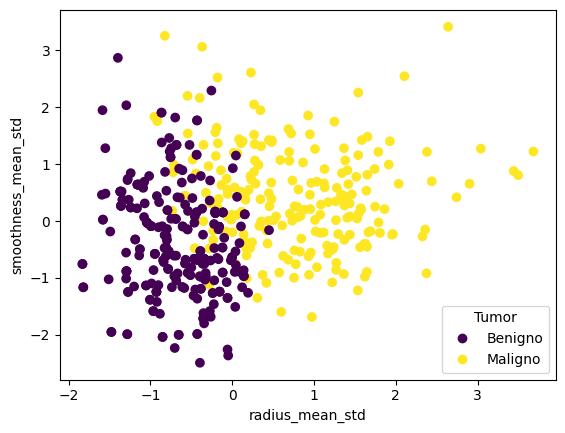

In [42]:
mean_radius_mean = data_df['radius_mean'].mean()
mean_smoothness_mean = data_df['smoothness_mean'].mean()

std_radius_mean = data_df['radius_mean'].std()
std_smoothness_mean = data_df['smoothness_mean'].std()

std_data_df = data_df.copy()
std_data_df['radius_mean'] = (data_df['radius_mean'] - mean_radius_mean) / std_radius_mean
std_data_df['smoothness_mean'] = (data_df['smoothness_mean'] - mean_smoothness_mean) / std_smoothness_mean

plt.figure()
scatter = plt.scatter(std_data_df['radius_mean'], std_data_df['smoothness_mean'], c=std_data_df['pronostic'])
plt.xlabel('radius_mean_std')
plt.ylabel('smoothness_mean_std')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_names, title="Tumor")
plt.show()

3. Cree el modelo de regresión logística utilizando la función `LogisticRegression` de la librería `sklearn.linear_model`. Y ajuste el modelo a los datos que importó en el punto 1 con el método `.fit`

In [43]:
# X: vector de caracteristicas
# y: vector de etiquetas/targets
X = std_data_df[['radius_mean', 'smoothness_mean']]
y = std_data_df['pronostic']

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

3. Interprete los resultados del output del modelo. ¿qué significa el método `.intercept_` y `.coef` del modelo de regresión?

In [44]:
w = [log_reg.intercept_[0], log_reg.coef_[0][0], log_reg.coef_[0][1]]
print(w)

[0.09668452676012036, 4.166848837145406, 1.3373474571242179]


**Responder pregunta 3**

4. Grafique la recta de regresión obtenida junto con los datos del scatterplot estandarizado. 

[<matplotlib.lines.Line2D object at 0x0000025716839A10>, <matplotlib.lines.Line2D object at 0x0000025716955590>]


TypeError: list.append() takes exactly one argument (0 given)

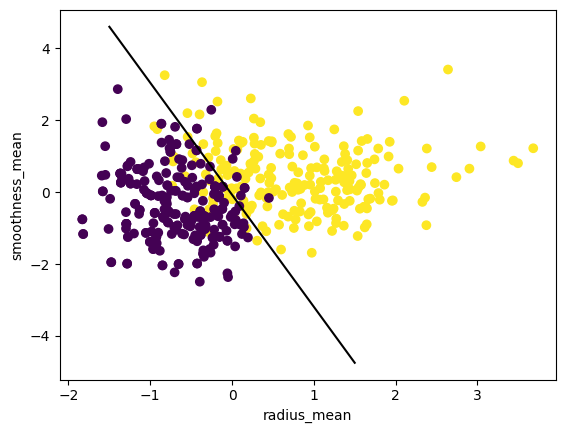

In [46]:
def get_decision_boundary(w):
    w0, w1, w2 = w[0], w[1], w[2]
    m = - w1 / w2
    b = - w0 / w2
    x = np.linspace(-1.5, 1.5, 100)
    y = m * x + b
    return y


decision_boundary = get_decision_boundary(w)


plt.figure()
# TODO graficar decision_boundary
scatter = plt.scatter(std_data_df['radius_mean'], std_data_df['smoothness_mean'], c=data_df['pronostic'])
plt.plot(np.linspace(-1.5, 1.5, 100), decision_boundary, color='black',label = "Decision Boundary")
plt.xlabel('radius_mean')
plt.ylabel('smoothness_mean')
print(scatter.legend_elements()[0])
plt.legend(handles=scatter.legend_elements()[0], labels=legend_names, title="Tumor")
plt.show()

5. Utilizando el modelo obtenido, determine cuántos: 
-  datos verdaderos de cáncer fueron clasificados como cáncer,
-  datos verdaderos de cáncer fueron clasificados como no cancer,
-  datos verdaderos de no cáncer fueron clasificados como cáncer, 
-  datos verdaderos de no cáncer fueron clasificados como no cáncer.


In [ ]:
# Matriz de confusion

6. Otra pesona nos da una recta para realizar la clasificación con los siguientes pesos e intercepto: $w=[3.1, 1]^T$ y $b=-1.07$. Repita los pasos 4 y 5 para la nueva recta. Compare este nuevo modelo de clasificación con respecto al obtenido utilizando la regresión logística.